In [1]:
import warnings

# 불필요한 경고 출력을 방지합니다.
warnings.filterwarnings('ignore')

import pandas as pd

#sklearn에서 제공하는 샘플 데이터를 사용함
from sklearn.datasets import load_iris
# iris 데이터셋을 로드합니다.
iris = load_iris()
#딕셔너리 형태로 나옴


* `DESCR`: 데이터셋의 정보를 보여줍니다.
* `data`: feature data.
* `feature_names`: feature data의 컬럼 이름
* `target`: label data (수치형)
* `target_names`: label의 이름 (문자형)

In [3]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
data = iris['data'] # 설명변수
data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [5]:
feature_names = iris['feature_names'] # 설명변수이름
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

* **sepal**: 꽃 받침
* **petal**: 꽃잎

In [6]:
target = iris['target'] # 반응변수
target[:5]

array([0, 0, 0, 0, 0])

In [7]:
iris['target_names'] # 반응변수이름

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### 데이터프레임 만들기

In [8]:
df_iris = pd.DataFrame(data, columns=feature_names)
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
df_iris['target'] = target
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 시각화

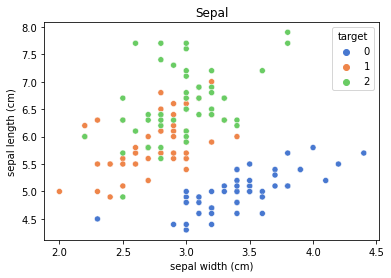

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# sns.scatterplot(x축, y축, hue = 나타낼 값)
sns.scatterplot('sepal width (cm)', 'sepal length (cm)', hue='target', palette='muted', data=df_iris)
plt.title('Sepal')
plt.show()

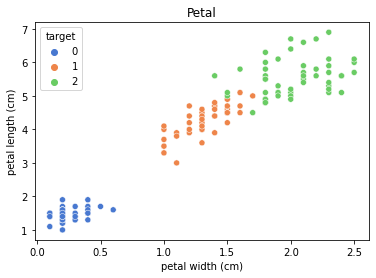

In [12]:
sns.scatterplot('petal width (cm)', 'petal length (cm)', hue='target', palette='muted', data=df_iris)
plt.title('Petal')
plt.show()

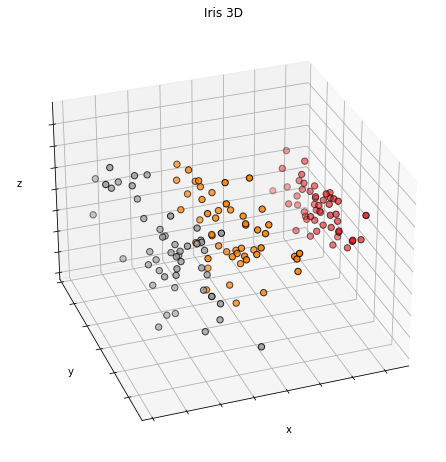

In [14]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA #for 차원축소

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(df_iris.drop('target', 1))
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=df_iris['target'],
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("Iris 3D")
ax.set_xlabel("x")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("y")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("z")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [15]:
iris = load_iris()
feature_names = iris['feature_names']
target = iris['target']

df_iris = pd.DataFrame(data, columns=feature_names)
df_iris['target'] = target

df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
# train, vaild set 나누기

from sklearn.model_selection import train_test_split

#train_test_split(feature data, target data)
x_train, x_valid, y_train, y_valid = train_test_split(df_iris.drop('target', 1), df_iris['target'])
# train에는 반응변수 열 삭제, axis = 1

x_train.shape, y_train.shape, x_valid.shape, y_valid.shape

((112, 4), (112,), (38, 4), (38,))

<AxesSubplot:xlabel='target', ylabel='count'>

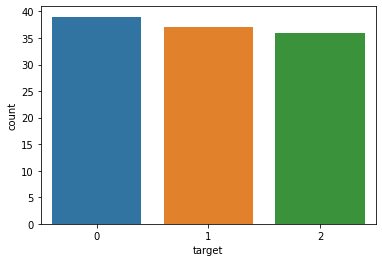

In [17]:
sns.countplot(y_train)

stratify: label의 클래스의 분포를 균등하게 배분

위의 코드는 반복할때마다 y_train의 클래스 분포가 바뀜

그리고 균등하지가 않음. 이렇게 되면 모델의 설명력이 떨어질 수 있음

ex) 0이 제일 많으면 0으로 예측할 확률이 높아진다던지...

이걸 방지하기 위해 train과 valid를 나눌때 stratify=df_iris['target'] 코드를 넣어줘서

클래스 분포를 일정해게 맞춰줘야 함.


물론 이것도 돌릴때마다 결과가 달라지긴 하는데, 그래도 0, 1, 2 가 균등하게 나옴

<AxesSubplot:xlabel='target', ylabel='count'>

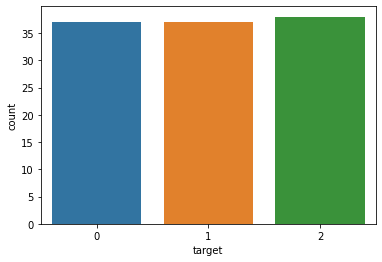

In [29]:
x_train, x_valid, y_train, y_valid = train_test_split(df_iris.drop('target', 1), df_iris['target'], stratify=df_iris['target'])

sns.countplot(y_train)

In [30]:
x_train.shape, y_train.shape, x_valid.shape, y_valid.shape

((112, 4), (112,), (38, 4), (38,))

### Logistic Regression


* 로지스틱 회귀(영어: logistic regression)는 영국의 통계학자인 D. R. Cox가 1958년에 제안한 확률 모델
* 독립 변수의 선형 결합을 이용하여 사건의 발생 가능성을 예측하는데 사용되는 통계 기법


LogisticRegression, 서포트 벡터 머신 (SVM) 과 같은 알고리즘은 이진 분류만 가능합니다. (2개의 클래스 판별만 가능합니다.)

하지만, 3개 이상의 클래스에 대한 판별을 진행하는 경우, 다음과 같은 전략으로 판별하게 됩니다.

**one-vs-rest (OvR)**: K 개의 클래스가 존재할 때, 1개의 클래스를 제외한 다른 클래스를 K개 만들어, 각각의 이진 분류에 대한 확률을 구하고, 총합을 통해 최종 클래스를 판별

**one-vs-one (OvO)**: 4개의 계절을 구분하는 클래스가 존재한다고 가정했을 때, 0vs1, 0vs2, 0vs3, ... , 2vs3 까지 NX(N-1)/2 개의 분류기를 만들어 가장 많이 양성으로 선택된 클래스를 판별

대부분 **OvsR 전략을 선호**합니다.

In [31]:
from sklearn.linear_model import LogisticRegression
# 이게 분류기...?

**step 1: 모델 선언**

In [32]:
lr = LogisticRegression()

**step 2: 모델 학습**

In [33]:
lr.fit(x_train, y_train)

LogisticRegression()

**step 3: 예측**

In [34]:
prediction = lr.predict(x_valid)
prediction[:5]

array([1, 2, 0, 0, 1])

**step 4: 평가**

In [35]:
(prediction == y_valid).mean()

0.9736842105263158

## SGDClassifier

stochastic gradient descent (SGD): 확률적 경사 하강법

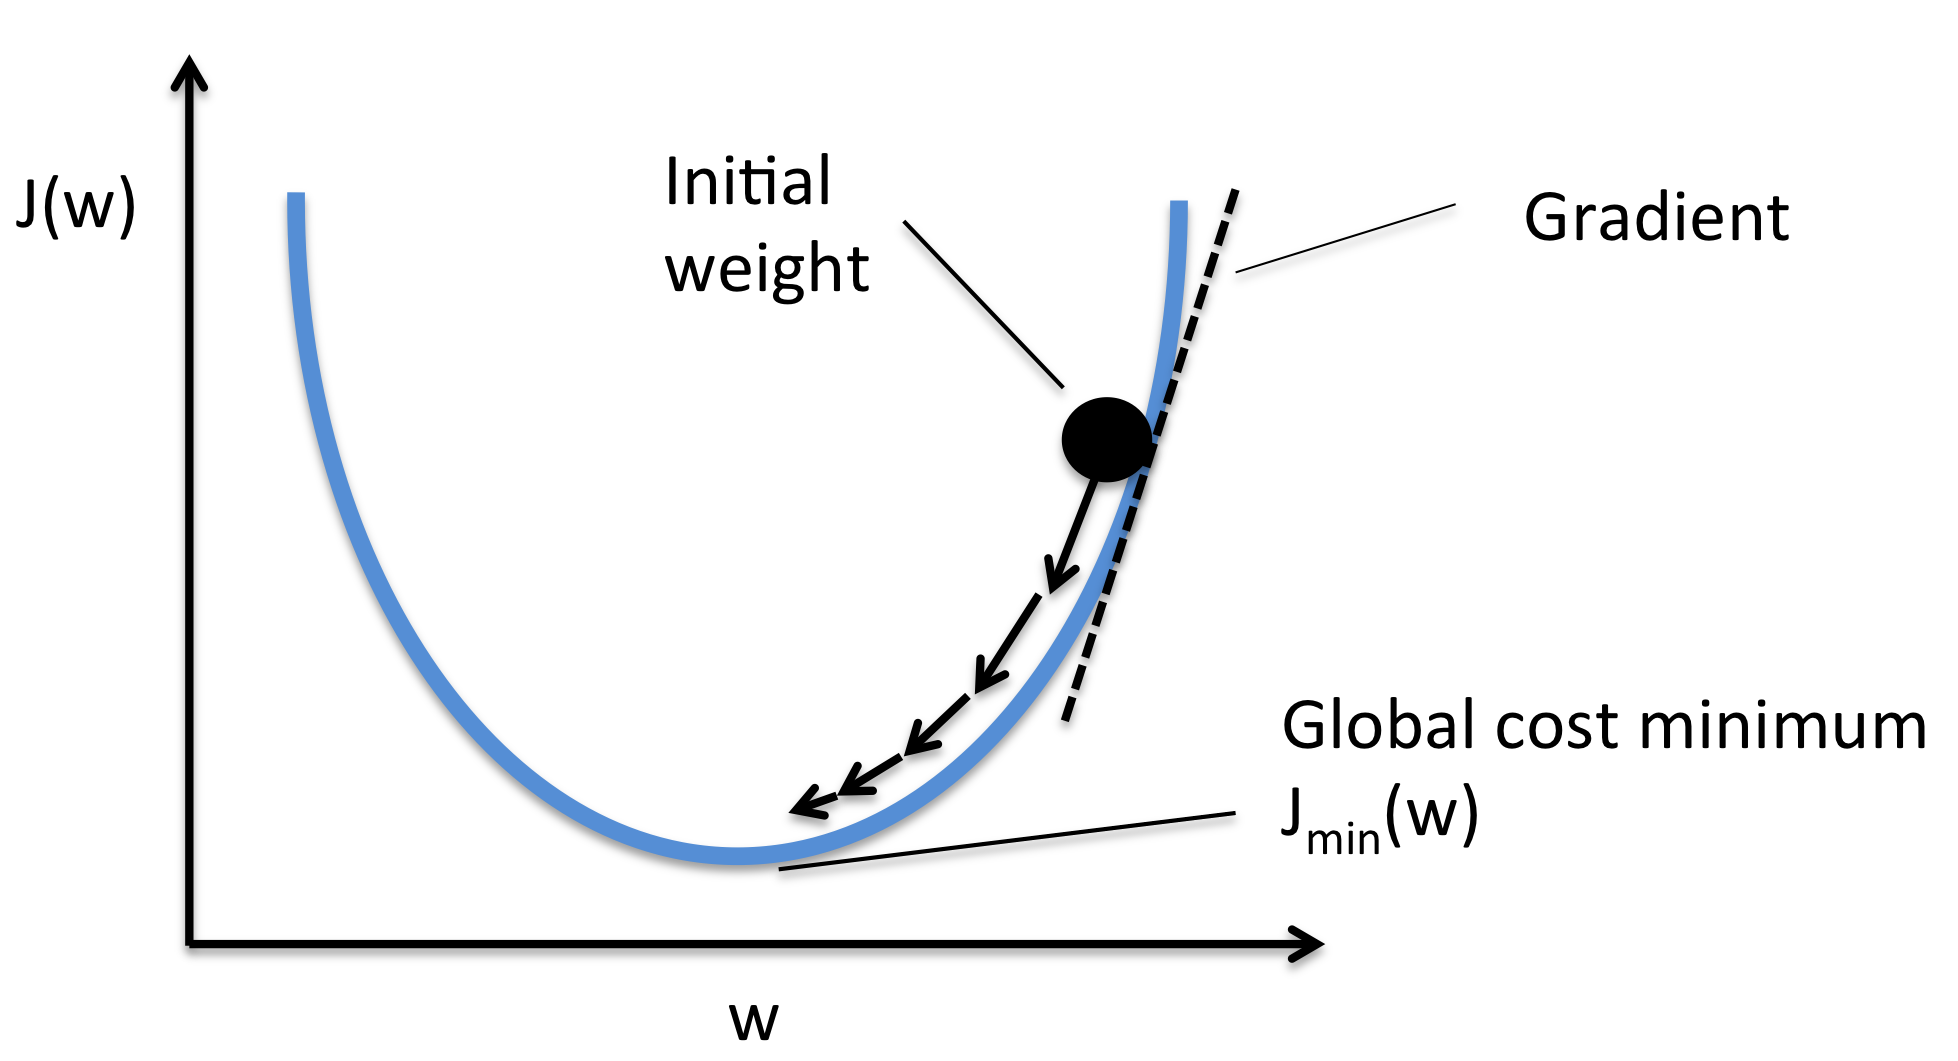

In [36]:
from IPython.display import Image
Image('https://machinelearningnotepad.files.wordpress.com/2018/04/yk1mk.png', width=500)

In [37]:
from sklearn.linear_model import SGDClassifier
#SGDClassifier는 분류기 SGDRegressor는 회귀

**step 1: 모델 선언**

In [38]:
sgd_L2 = SGDClassifier(penalty='l2', random_state=0, n_jobs=-1)

**step 2: 모델 학습**

In [39]:
sgd_L2.fit(x_train, y_train)

SGDClassifier(n_jobs=-1, random_state=0)

**step 3: 예측**

In [40]:
prediction = sgd_L2.predict(x_valid)

**step 4: 평가**

In [41]:
(prediction == y_valid).mean()

0.7894736842105263

## 하이퍼 파라미터 (hyper-parameter) 튜닝

각 알고리즘 별, hyper-parameter의 종류가 다양합니다.

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l1',
              power_t=0.5, random_state=0, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


모두 다 외워서 할 수는 없습니다! 문서를 보고 적절한 가설을 세운 다음 적용하면서 검증해야합니다.

(나중에는 이 또한 자동으로 할 수 있습니다)

* random_state: 하이퍼 파라미터 튜닝시, 고정할 것

* n_jobs=-1: CPU를 모두 사용 (학습속도가 빠름)

penalty는 라쏘(L1) 엘라스틱 릿지(L2) 등, random_state는 random을 고정 (하이퍼 파라미터를 조정할땐 반드시 고정해야한다.) n_jobs는 CPU사용 정도 웬만하면 -1

In [46]:
sgd_elasticnet = SGDClassifier(penalty='elasticnet', random_state=0, n_jobs=-1)
#penalty = l1 라쏘, l2 릿지, elasticnet 엘라스틱넷
#default는 l2

sgd_elasticnet.fit(x_train, y_train)

prediction_elasticnet = sgd_elasticnet.predict(x_valid)

(prediction_elasticnet == y_valid).mean()

0.8421052631578947

In [49]:
sgd_l1 = SGDClassifier(penalty='l1', random_state=0, n_jobs=-1)
#penalty = l1 라쏘, l2 릿지, elasticnet 엘라스틱넷
#default는 l2

sgd_l1.fit(x_train, y_train)

prediction_l1 = sgd_l1.predict(x_valid)

(prediction_l1 == y_valid).mean()

0.8421052631578947

In [50]:
sgd_l2 = SGDClassifier(penalty='l2', random_state=0, n_jobs=-1)
#penalty = l1 라쏘, l2 릿지, elasticnet 엘라스틱넷
#default는 l2

sgd_l2.fit(x_train, y_train)

prediction_l2 = sgd_l2.predict(x_valid)

(prediction_l2 == y_valid).mean()

0.7894736842105263

penalty 의 default는 L2

L2일때의 정확도 : 0.7894736842105263

L1일때의 정확도 : 0.8421052631578947

## KNeighborsClassifier

최근접 이웃 알고리즘


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


K(n_neighbors)의 default는 5

일반적으로 홀수개를 넣는다. (동점방지)

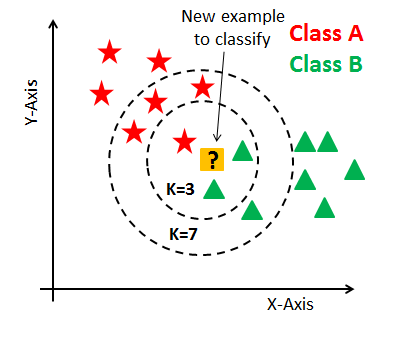

In [51]:
Image('https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final_a1mrv9.png')

In [120]:
from sklearn.neighbors import KNeighborsClassifier

In [122]:
knc = KNeighborsClassifier()
knc.fit(x_train, y_train)
knc_pred = knc.predict(x_valid)
(knc_pred == y_valid).mean()

0.9736842105263158

In [131]:
knc = KNeighborsClassifier(n_neighbors = 9)
knc.fit(x_train, y_train)
knc_pred = knc.predict(x_valid)
(knc_pred == y_valid).mean()

1.0

서포트 벡터 머신 (SVC)

새로운 데이터가 어느 카테고리에 속할지 판단하는 비확률적 이진 선형 분류 모델을 만듦.

경계로 표현되는 데이터들 중 가장 큰 폭을 가진 경계를 찾는 알고리즘.


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

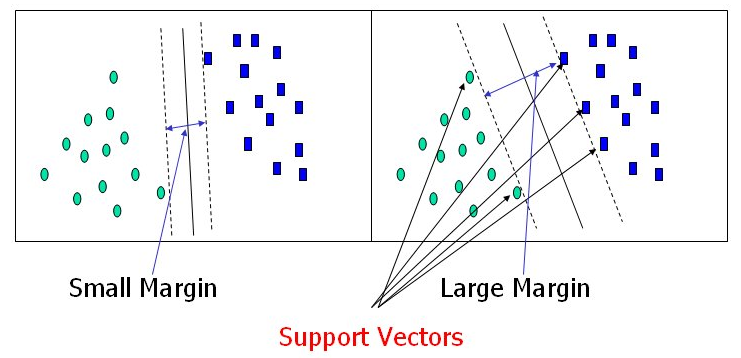

In [132]:
Image('https://csstudy.files.wordpress.com/2011/03/screen-shot-2011-02-28-at-5-53-26-pm.png')

LogisticRegression과 같이 이진 분류만 가능합니다. (2개의 클래스 판별만 가능합니다.)

OvsR 전략 사용

In [133]:
from sklearn.svm import SVC

In [134]:
svc = SVC(random_state=0)
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_valid)
(svc_pred == y_valid).mean()

1.0

In [136]:
# 각 클래스 별 확률값을 return 해주는 decision_function()

svc.decision_function(x_valid)[:5]

array([[-0.2272599 ,  1.0896517 ,  2.21319469],
       [-0.22394874,  2.22473424,  0.99281125],
       [ 2.23494021,  1.12447256, -0.24965966],
       [-0.20261477,  0.87501118,  2.2275106 ],
       [ 2.22642504,  1.15086767, -0.24883315]])

의사 결정 나무 (Decision Tree)

스무고개처럼, 나무 가지치기를 통해 소그룹으로 나누어 판별하는 것

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [139]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(x_train, y_train)
dtc_pred = dtc.predict(x_valid)
(dtc_pred == y_valid).mean()

0.9473684210526315

In [1]:
from sklearn.tree import export_graphviz
from subprocess import call

In [2]:
def graph_tree(model):
    # .dot 파일로 export 해줍니다
    export_graphviz(model, out_file='tree.dot')

    # 생성된 .dot 파일을 .png로 변환
    
    call(['dot', '-Tpng', 'tree.dot', '-o', 'decistion-tree.png', '-Gdpi=600'])

    # .png 출력
    return Image(filename = 'decistion-tree.png', width=500)

In [3]:
graph_tree(dtc)

NameError: name 'dtc' is not defined

gini계수: 불순도를 의미하며, 계수가 높을 수록 엔트로피가 크다는 의미하며

엔트로피가 크다는 의미는 쉽게 말해서, 클래스가 혼잡하게 섞여 있다는 뜻입니다.

In [147]:
dtc = DecisionTreeClassifier(max_depth=2)
dtc.fit(x_train, y_train)
dtc_pred = dtc.predict(x_valid)

In [148]:
graph_tree(dtc)

FileNotFoundError: [WinError 2] 지정된 파일을 찾을 수 없습니다